1. Read the images and generate the train and test dataset (10 points)
2. Divide the data set into Train and validation data sets ( 10 points)
3. Initialize & build the model (20 points)
4. Optimize the model (15 points)
5. Predict the accuracy for both train and validation data (5 points)

In [17]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Convolution2D,BatchNormalization
from keras.layers import GlobalAveragePooling2D
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
import os
from skimage import io
from skimage.transform import resize

In [4]:
print(os.getcwd())

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN


In [13]:
PROJECT_ROOT_DIR = r"/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train"

In [14]:
# Sampling categories
CATEGORIES=["Black-grass","Charlock","Cleavers","Common Chickweed","Common wheat","Fat Hen","Loose Silky-bent","Maize","Scentless Mayweed","Shepherds Purse","Small-flowered Cranesbill","Sugar beet"]

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Black-grass5a1295fb4.png


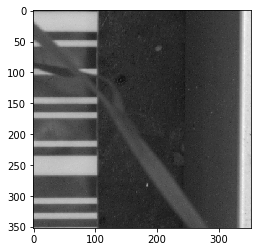

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Black-grassd8afd58f3.png


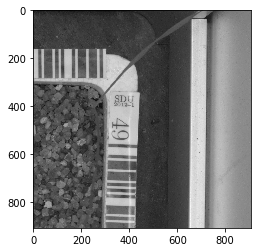

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Charlockead0df392.png


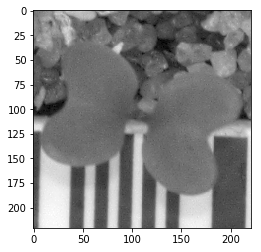

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Charlock30a669574.png


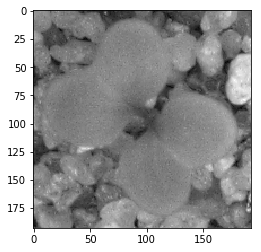

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Cleavers6a4ef17c2.png


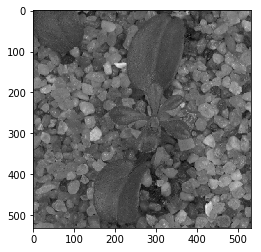

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Cleavers0515bc601.png


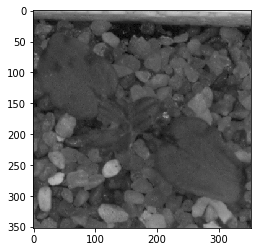

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Common Chickweedd07b7062b.png


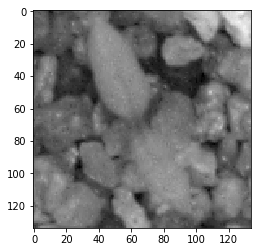

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Common Chickweed99c59a981.png


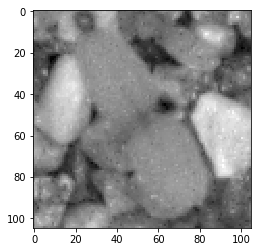

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Common wheat93b577009.png


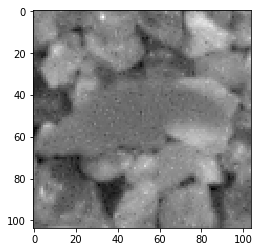

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Common wheatf77095d24.png


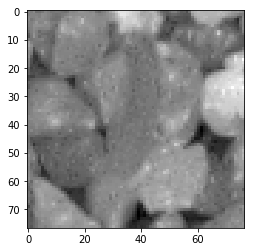

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Fat Hen14f7687d1.png


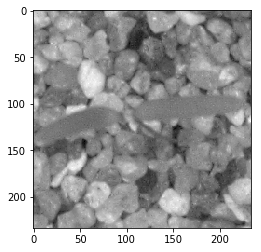

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Fat Hen9d4722e74.png


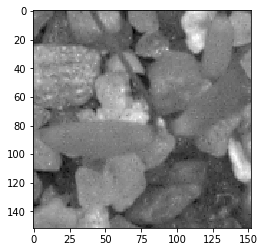

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Loose Silky-bent997ffd9ae.png


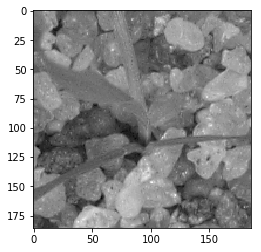

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Loose Silky-bent25b804889.png


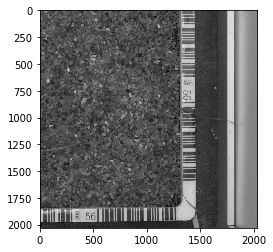

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Maize648ddc558.png


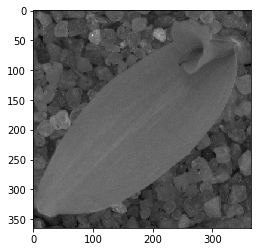

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Maize919e154c2.png


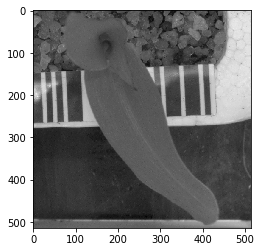

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Scentless Mayweed8bc379617.png


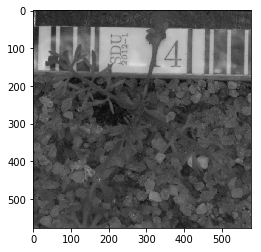

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Scentless Mayweed5add1370e.png


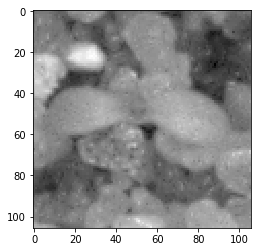

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Shepherds Pursea0ec33869.png


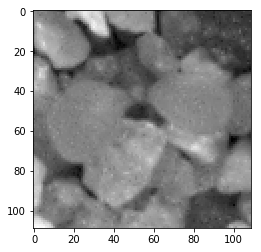

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Shepherds Purse33010c8cb.png


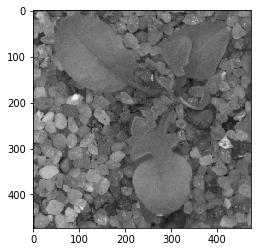

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Small-flowered Cranesbill8023cf2e2.png


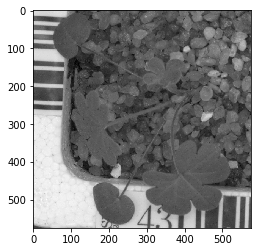

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Small-flowered Cranesbill78730a816.png


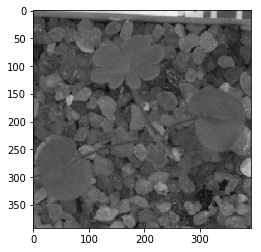

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Sugar beet89c1a501a.png


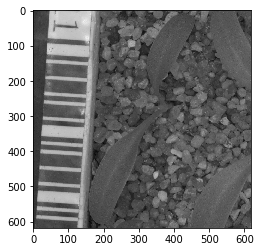

/Users/ashishsingh/AIML/Assignments/Computer Vision with CNN/plant-seedlings-classification/train/Sugar beetb0264558c.png


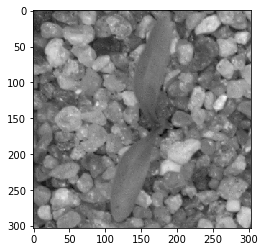

In [19]:
# read first 1-1 images from all categories
for category in CATEGORIES:
    path = os.path.join(PROJECT_ROOT_DIR,category)
#     print(path)
    i = 0
    for img in os.listdir(path):
        if(i < 2):
            i += 1
            print(path + img)
            img_array = io.imread(os.path.join(path,img),as_gray=True)
            plt.imshow(img_array,cmap="gray")
            plt.show()

In [20]:
# Create training dataset
training_data = []
img_size=50

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(PROJECT_ROOT_DIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = io.imread(os.path.join(path,img),as_gray=True)      
            new_array = resize(img_array, (img_size,img_size))
            training_data.append([new_array,class_num]) 

In [24]:
create_training_data()

/Users/ashishsingh/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/ashishsingh/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [25]:
len(training_data)

4750

In [26]:
X=[]
Y=[]

for feature, label in training_data:
    X.append(feature)
    Y.append(label)
# reimage the shape into 50*50 size
X = np.array(X).reshape(-1,img_size,img_size,1)

In [28]:
Y = np.array(Y)

In [29]:
X.shape

(4750, 50, 50, 1)

In [30]:
Y.shape

(4750,)

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.30, random_state=7)

In [32]:
X_train.shape

(3325, 50, 50, 1)

In [33]:
#Initialize Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())

model.add(BatchNormalization())
# 1st Dense Layers
model.add(Dense(500))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
#output layer
model.add(Dense(12))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [34]:
#Represent Training & validation samples suitable for tensorflow backend
X_train = X_train.reshape(X_train.shape[0], 50, 50, 1).astype('float32') # The digit 1 signifies the images are in grayscale
X_val = X_val.reshape(X_val.shape[0], 50, 50, 1).astype('float32')

In [35]:
X_train.shape

(3325, 50, 50, 1)

In [37]:
X_val.shape

(1425, 50, 50, 1)

In [38]:
X_train/=255
X_val/=255    # standardize the data for train and test to be between 0 -1

In [39]:
#Encoding the output class label (One-Hot Encoding)
y_train = np_utils.to_categorical(y_train, 12)
y_val = np_utils.to_categorical(y_val, 12)

In [40]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])

In [41]:
model.fit(X_train, y_train, batch_size=32, epochs=10, 
              validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 3325 samples, validate on 1425 samples
Epoch 1/10
3325/3325 [==============================] - 40s 12ms/step - loss: 2.4721 - acc: 0.1383 - val_loss: 2.4774 - val_acc: 0.1446
Epoch 2/10
3325/3325 [==============================] - 39s 12ms/step - loss: 2.4447 - acc: 0.1519 - val_loss: 2.6766 - val_acc: 0.1460
Epoch 3/10
3325/3325 [==============================] - 39s 12ms/step - loss: 2.4136 - acc: 0.1567 - val_loss: 4.2480 - val_acc: 0.1446
Epoch 4/10
3325/3325 [==============================] - 39s 12ms/step - loss: 2.3672 - acc: 0.1669 - val_loss: 9.4437 - val_acc: 0.1446
Epoch 5/10
3325/3325 [==============================] - 39s 12ms/step - loss: 2.3139 - acc: 0.1877 - val_loss: 8.4771 - val_acc: 0.1446
Epoch 6/10
3325/3325 [==============================] - 39s 12ms/step - loss: 2.2329 - acc: 0.2451 - val_loss: 4.8061 - val_acc: 0.1228
Epoch 7/10
3325/3325 [==============================] - 40s 12ms/step - loss: 2.1426 - a

Performance not good .. trying another optimizer

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=10, 
              validation_data=(X_val, y_val))

Train on 3325 samples, validate on 1425 samples
Epoch 1/10
3325/3325 [==============================] - 47s 14ms/step - loss: 2.4068 - acc: 0.1904 - val_loss: 15.2245 - val_acc: 0.0554
Epoch 2/10
3325/3325 [==============================] - 46s 14ms/step - loss: 2.1578 - acc: 0.2605 - val_loss: 13.7880 - val_acc: 0.1446
Epoch 3/10
3325/3325 [==============================] - 46s 14ms/step - loss: 2.0037 - acc: 0.3212 - val_loss: 15.3603 - val_acc: 0.0470
Epoch 4/10
3325/3325 [==============================] - 46s 14ms/step - loss: 1.8726 - acc: 0.3693 - val_loss: 15.3603 - val_acc: 0.0470
Epoch 5/10
3325/3325 [==============================] - 47s 14ms/step - loss: 1.5498 - acc: 0.4836 - val_loss: 15.3603 - val_acc: 0.0470
Epoch 6/10
3325/3325 [==============================] - 49s 15ms/step - loss: 1.2585 - acc: 0.5747 - val_loss: 14.5459 - val_acc: 0.0975
Epoch 7/10
3325/3325 [==============================] - 55s 17ms/step - loss: 0.9540 - acc: 0.6839 - val_loss: 14.5455 - val_acc: 

In [44]:
#Initialize Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())

model.add(BatchNormalization())
# 1st Dense Layers
model.add(Dense(500))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
#output layer
model.add(Dense(12))
model.add(Activation('softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=10,validation_data=(X_val, y_val))

Train on 3325 samples, validate on 1425 samples
Epoch 1/10
3325/3325 [==============================] - 49s 15ms/step - loss: 2.2840 - acc: 0.1973 - val_loss: 15.3603 - val_acc: 0.0470
Epoch 2/10
3325/3325 [==============================] - 47s 14ms/step - loss: 2.0812 - acc: 0.2944 - val_loss: 15.3603 - val_acc: 0.0470
Epoch 3/10
3325/3325 [==============================] - 47s 14ms/step - loss: 1.8788 - acc: 0.3600 - val_loss: 15.3603 - val_acc: 0.0470
Epoch 4/10
3325/3325 [==============================] - 48s 14ms/step - loss: 1.7192 - acc: 0.4135 - val_loss: 14.5459 - val_acc: 0.0975
Epoch 5/10
3325/3325 [==============================] - 48s 14ms/step - loss: 1.5011 - acc: 0.4980 - val_loss: 15.3942 - val_acc: 0.0449
Epoch 6/10
3325/3325 [==============================] - 49s 15ms/step - loss: 1.2013 - acc: 0.5931 - val_loss: 15.2245 - val_acc: 0.0554
Epoch 7/10
3325/3325 [==============================] - 50s 15ms/step - loss: 0.9855 - acc: 0.6641 - val_loss: 15.3942 - val_acc: 

Performance still not great for validation dataset

In [46]:
#Initialize Sequential model
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:]))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model1.add(Conv2D(64, (3, 3), activation='relu'))

# Max Pooling
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
#model1.add(Flatten())

model1.add(GlobalAveragePooling2D())
model1.add(BatchNormalization())
# 1st Dense Layers
model1.add(Dense(500))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Dense(1000))
model1.add(Activation('relu'))
# Dropout
model1.add(Dropout(0.25))
model1.add(Dense(1500))
model1.add(Activation('relu'))
#output layer
model1.add(Dense(12))
model1.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [47]:
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [48]:
batch_size = 64
epochs = 10

model1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 3325 samples, validate on 1425 samples
Epoch 1/10
3325/3325 [==============================] - 38s 11ms/step - loss: 0.2763 - acc: 0.9167 - val_loss: 1.4924 - val_acc: 0.8464
Epoch 2/10
3325/3325 [==============================] - 36s 11ms/step - loss: 0.2678 - acc: 0.9166 - val_loss: 2.2855 - val_acc: 0.8574
Epoch 3/10
3325/3325 [==============================] - 35s 11ms/step - loss: 0.2656 - acc: 0.9167 - val_loss: 2.2855 - val_acc: 0.8574
Epoch 4/10
3325/3325 [==============================] - 36s 11ms/step - loss: 0.2640 - acc: 0.9164 - val_loss: 1.2175 - val_acc: 0.8412
Epoch 5/10
3325/3325 [==============================] - 38s 11ms/step - loss: 0.2641 - acc: 0.9166 - val_loss: 2.2855 - val_acc: 0.8574
Epoch 6/10
3325/3325 [==============================] - 38s 11ms/step - loss: 0.2635 - acc: 0.9166 - val_loss: 2.1005 - val_acc: 0.8574
Epoch 7/10
3325/3325 [==============================] - 36s 11ms/step - loss: 0.2618 - acc: 0.9167 - val_loss: 2.4111 - val_acc: 0.8496


Performance significantly improved

In [49]:
#Evaluate the model on the train data
score_train = model1.evaluate(X_train, y_train)

#Accuracy on test data
print('Accuracy on the Train Images: ', score_train[1])

3325/3325 [==============================] - 8s 2ms/step
Accuracy on the Train Images:  0.8431578741037756


In [50]:
#Evaluate the model on the validation data
score_val = model1.evaluate(X_val, y_val)

#Accuracy on test data
print('Accuracy on the Test Images: ', score_val[1])

1425/1425 [==============================] - 4s 3ms/step
Accuracy on the Test Images:  0.841169567651916
